# NLP - Session 5 - SpaCy Introduction for NLP | REGEX Based Text Extraction and Matching

#### Text Extraction and Matching
`SpaCy` is a free, open-source library for advanced Natural Language Processing (NLP) in Python.

If you’re working with a lot of text, you’ll eventually want to know more about it. For example, what’s it about? What do the words mean in context? Who is doing what to whom? What companies and products are mentioned? Which texts are similar to each other?

spaCy is designed specifically for production use and helps you build applications that process and “understand” large volumes of text. It can be used to build information extraction or natural language understanding systems, or to pre-process text for deep learning.

Below are some of spaCy’s features and capabilities. Some of them refer to linguistic concepts, while others are related to more general machine learning functionality.

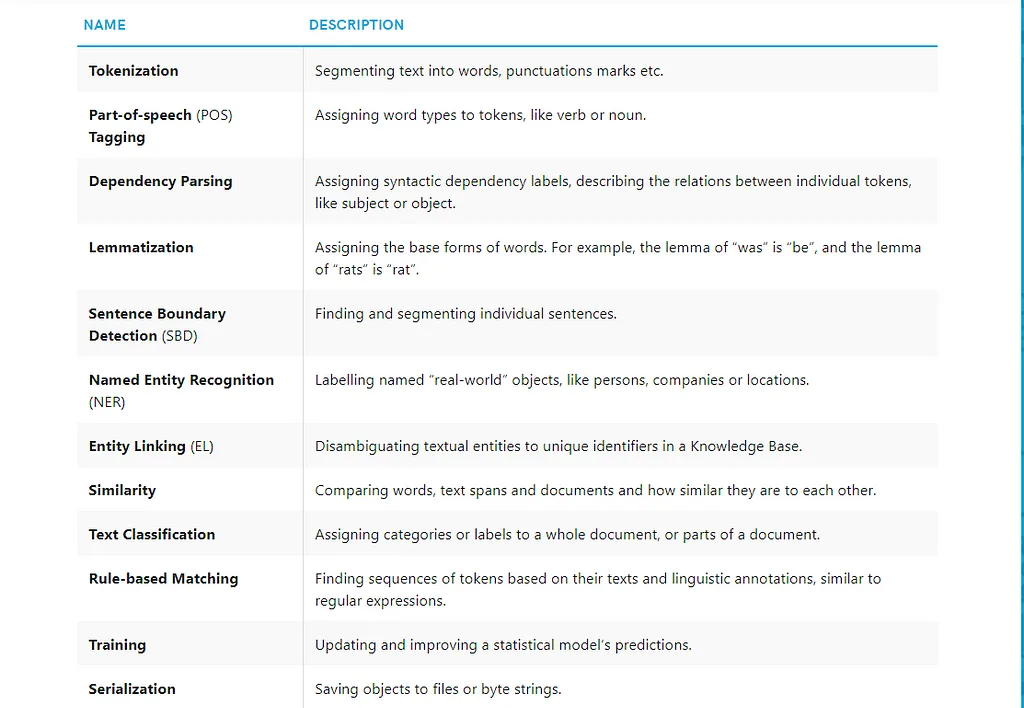

#### SpaCy installation
You can run the following commands:-

`!pip install -U spacy`

`!pip install -U spacy-lookups-data`

`!python -m spacy download en_core_web_sm`

#### SpaCy Pipelining
When you call nlp on a text, spaCy first tokenizes the text to produce a Doc object. The Doc is then processed in several different steps – this is also referred to as the processing pipeline. The pipeline used by the default models consists of a tagger, a parser and an entity recognizer. Each pipeline component returns the processed Doc, which is then passed on to the next component.

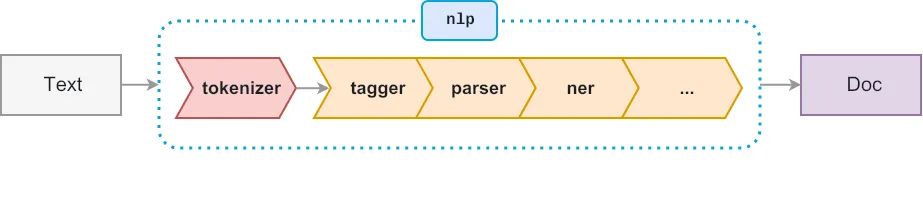

#### Rule-based matching
Compared to using regular expressions on raw text, spaCy’s rule-based matcher engines and components not only let you find you the words and phrases you’re looking for – they also give you access to the tokens within the document and their relationships.

This means you can easily access and analyze the surrounding tokens, merge spans into single tokens or add entries to the named entities in doc.ents.

#### Token-based matching
SpaCy features a rule-matching engine, the Matcher, that operates over tokens, similar to regular expressions.

The rules can refer to token annotations (e.g. the token text or tag_, and flags (e.g. IS_PUNCT).

The rule matcher also lets you pass in a custom callback to act on matches – for example, to merge entities and apply custom labels.

You can also associate patterns with entity IDs, to allow some basic entity linking or disambiguation. To match large terminology lists, you can use the PhraseMatcher, which accepts Doc objects as match patterns.

#### Adding patterns
Let’s say we want to enable spaCy to find a combination of three tokens:

 - A token whose lowercase form matches “hello”, e.g. “Hello” or “HELLO”.
 - A token whose is_punct flag is set to True, i.e. any punctuation.
 - A token whose lowercase form matches “world”, e.g. “World” or “WORLD”.

`[{"LOWER": "hello"}, {"IS_PUNCT": True}, {"LOWER": "world"}]`

When writing patterns, keep in mind that each dictionary represents one token. If spaCy’s tokenization doesn’t match the tokens defined in a pattern, the pattern is not going to produce any results. When developing complex patterns, make sure to check examples against spaCy’s tokenization

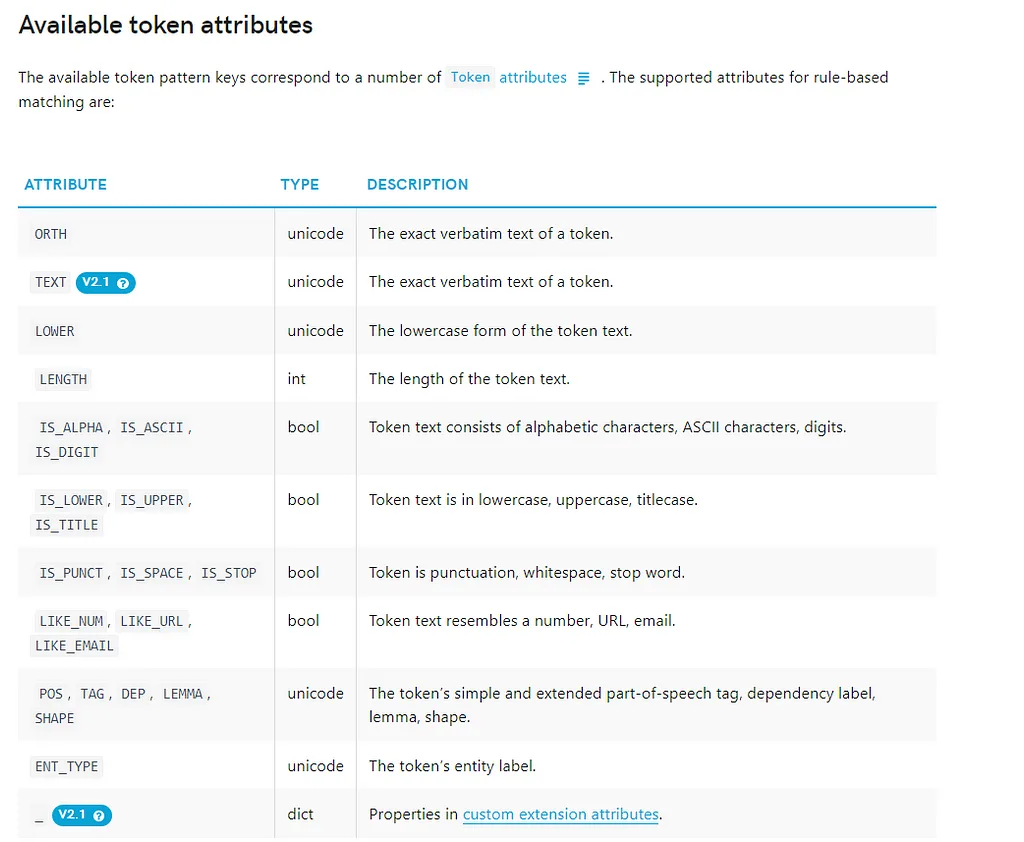

In [1]:
import spacy
from spacy.matcher import Matcher
from spacy.tokens import Span
from spacy import displacy

In [2]:
nlp = spacy.load("en_core_web_sm")

In [3]:
doc = nlp("Hello, World!")

In [4]:
for token in doc:
    print(token)

Hello
,
World
!


Now we are going to perform token based matching. We have defined a pattern which consists of-

 - A token whose lowercase form matches “hello”, e.g. “Hello” or “HELLO”.
 - A token whose is_punct flag is set to True, i.e. any punctuation.
 - A token whose lowercase form matches “world”, e.g. “World” or “WORLD”.
 
The matcher also lets you use quantifiers, specified as the `‘OP’` key. Quantifiers let you define sequences of tokens to be matched, e.g. one or more punctuation marks, or specify optional tokens. `'OP':'?'` makes the pattern optional, by allowing it to match 0 or 1 times.

In [5]:
pattern = [{"LOWER": "hello", 'OP':'?'}, {"IS_PUNCT": True, 'OP':'?'}, {"LOWER": "world"}]

`matcher.add()` adds a rule to the matcher, consisting of an ID key, one or more patterns, and a callback function to act on the matches. In our case the ID key is `HelloWorld`. We have not passed a callback function hence we have passed None. The matcher returns a list of `(match_id, start, end)` tuples. The `match_id` is the hash value of the string ID `“HelloWorld”`.

In [6]:
matcher = Matcher(nlp.vocab)
matcher.add("HelloWorld", None, pattern)

In [7]:
doc = nlp("Hello, World!")

In [8]:
matches = matcher(doc)

In [9]:
matches

[(15578876784678163569, 0, 3),
 (15578876784678163569, 1, 3),
 (15578876784678163569, 2, 3)]

In [10]:
for token in doc:
    print(token)

Hello
,
World
!


To see which token is matched we can run the code below.

In [11]:
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]
    span = doc[start:end]
    print(match_id, string_id, start, end, span.text)

15578876784678163569 HelloWorld 0 3 Hello, World
15578876784678163569 HelloWorld 1 3 , World
15578876784678163569 HelloWorld 2 3 World


You can get a visual representation of Phrase Extraction by visiting this link.

https://explosion.ai/demos/matcher

## Regular Expression
In some cases, only matching tokens and token attributes isn’t enough – for example, you might want to match different spellings of a word, without having to add a new pattern for each spelling. Regular expression is a string of text that allows you to create patterns that help match, locate, and manage text.

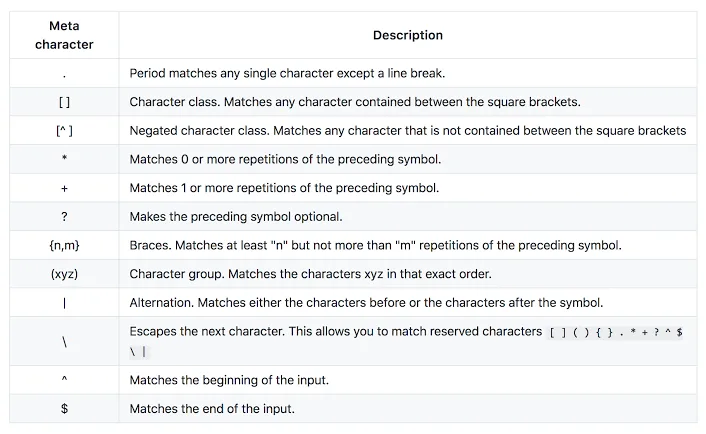

## Identifiers
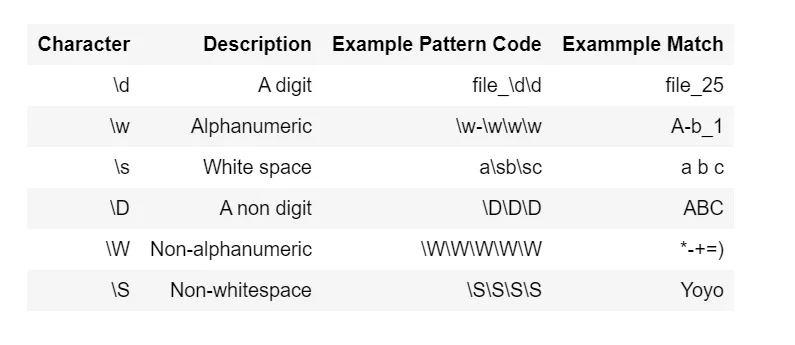

## Quantifiers
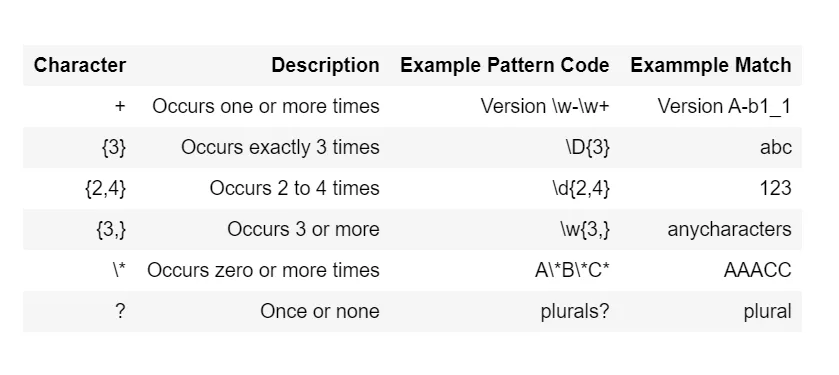

### Example
In this `^` represents start of line. The string should have characters from `a-z/0-9/_`. The length of the string should be between `3-15`. $ represents end of line.

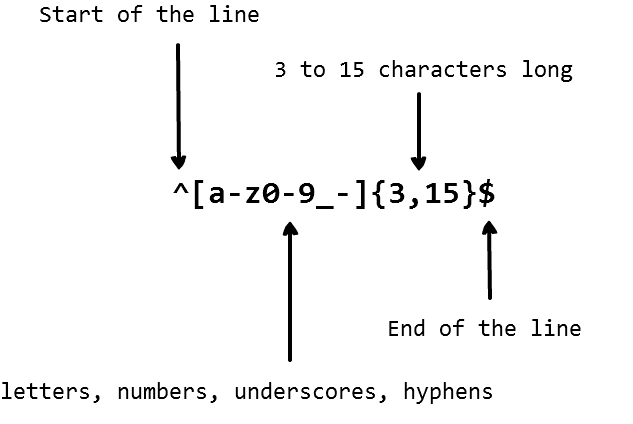

We will import `re`. This module provides regular expression matching operations.

This is the text we will be working on.

`re.search()` function will search the regular expression pattern and return the first occurrence. It returns a match object when the pattern is found and “null” if the pattern is not found. Now we are going to extract the phone number. To do that we are going to find a group of digits which is 10 character long.

`findall()` is used to search for “all” occurrences that match a given pattern. In contrast, search() module will only return the first occurrence that matches the specified pattern. findall() will iterate over all the lines of the file and will return all non-overlapping matches of pattern in a single step. Now we will find a group of digits which has length between `3 and 10`.

In [12]:
text = "my phone number is 1256. Ohh its wrong! Correct one is 1234567890. Call me!"

In [13]:
import re

Lets try to find digit 10 characters long.

In [14]:
re.search("\d{10}", text)

<re.Match object; span=(55, 65), match='1234567890'>

Lets try for 4 characters long.

In [15]:
re.search("\d{4}", text)

<re.Match object; span=(19, 23), match='1256'>

Lets try between 4 to 10.

In [16]:
re.findall("\d{3,10}", text)

['1256', '1234567890']

Find all words atleast 4 characters long.

In [17]:
re.findall(r"\w{4,}", text)

['phone', 'number', '1256', 'wrong', 'Correct', '1234567890', 'Call']

## Wildcard text
Wildcards are special characters that can stand in for unknown characters.

Lets find all which starts with `'p'`

In [18]:
re.findall(r"p....", text)

['phone']

In [19]:
re.findall(r"p..", text)

['pho']

In [20]:
text = "This is cat but not that. I want hat and cat both"

In [21]:
re.findall(r".a.", text)

['cat', 'hat', 'wan', 'hat', ' an', 'cat']

In [22]:
text = "hi thanks for watching <3"

In [23]:
re.findall(r"\d$", text)

['3']

## Exclusion

In [24]:
text = "hi thanks for watching <3"

In [25]:
re.findall(r"[^\d]+", text)

['hi thanks for watching <']

In [26]:
re.findall(r"[^\W]+", text)

['hi', 'thanks', 'for', 'watching', '3']

In [27]:
re.findall(r"[^\D]+", text)

['3']

In [28]:
text = "you can get free-videos on you-tube"

In [29]:
re.findall(r"[\w]+-[\w]+", text)

['free-videos', 'you-tube']

## Regular Expression in SpaCy
Match different spellings of token texts 

`pattern = [{"TEXT": {"REGEX": "deff?in[ia]tely"}}]`

Match tokens with fine-grained POS tags starting with ‘V’ 

`pattern = [{"TAG": {"REGEX": "^V"}}]`



In [30]:
text = "Google announced a new Pixel at Goofle I/O Google I/O is great place to get all updates from Google"
text

'Google announced a new Pixel at Goofle I/O Google I/O is great place to get all updates from Google'

Let's find out how many times "Google I/O" has occured.

In [31]:
pattern = [{"TEXT":"Google"}, {"TEXT":"I"}, {"TEXT":"/"}, {"TEXT":"O"}]

In [32]:
def callback_method(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    entity = doc[start:end]
    print(entity.text)

In [33]:
matcher = Matcher(nlp.vocab)
matcher.add("Google", callback_method, pattern)

In [34]:
doc = nlp(text)

In [35]:
matcher(doc)

Google I/O


[(11578853341595296054, 10, 14)]